In [2]:
import pandas as pd  # For working with data in tables (DataFrames)
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For creating basic plots
import seaborn as sns  # For creating more advanced and visually appealing plots

# This line sets a nice visual style for seaborn plots
sns.set_style('whitegrid')


In [13]:
# Replace 'train.csv' with the actual name of your file if it's different
df = pd.read_csv('train.csv')

# Let's see the first few rows of the data
print(df.head())

# Let's get some basic information about the data
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [15]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [17]:
print(df.describe(include='object'))

                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


In [19]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


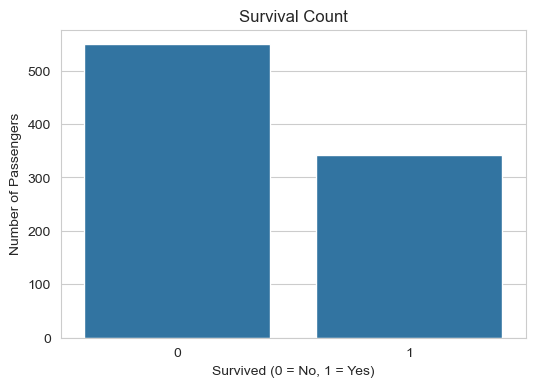

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.show()

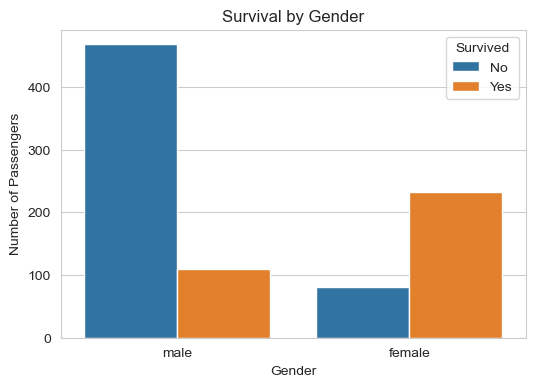

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

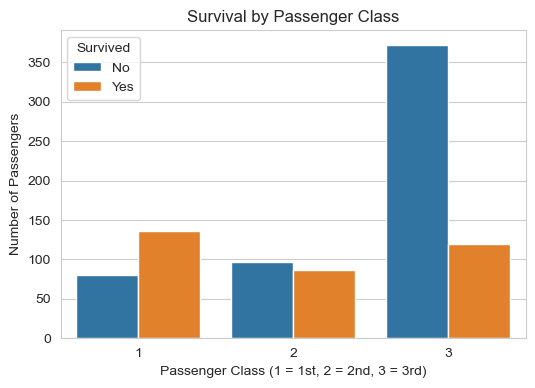

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

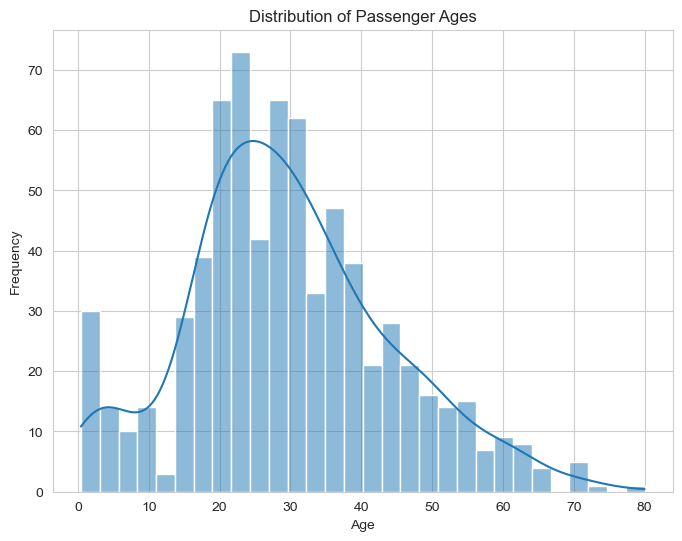

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True) # Drop missing values for plotting
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

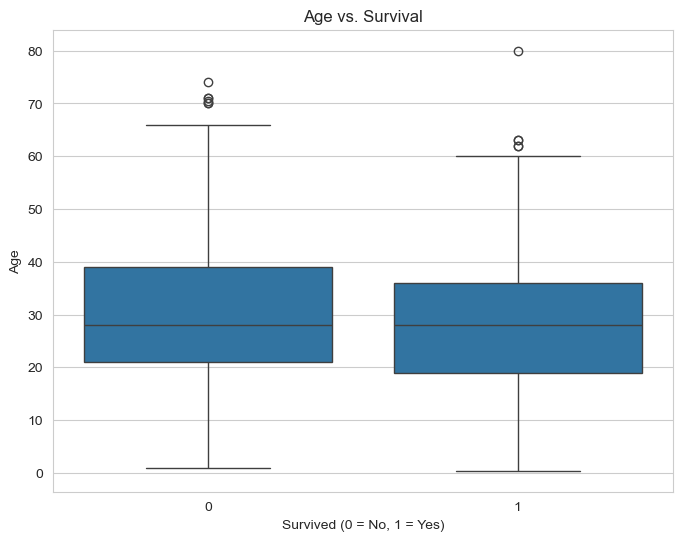

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age vs. Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

In [31]:
print(df[['SibSp', 'Parch', 'Fare']].describe())


            SibSp       Parch        Fare
count  891.000000  891.000000  891.000000
mean     0.523008    0.381594   32.204208
std      1.102743    0.806057   49.693429
min      0.000000    0.000000    0.000000
25%      0.000000    0.000000    7.910400
50%      0.000000    0.000000   14.454200
75%      1.000000    0.000000   31.000000
max      8.000000    6.000000  512.329200


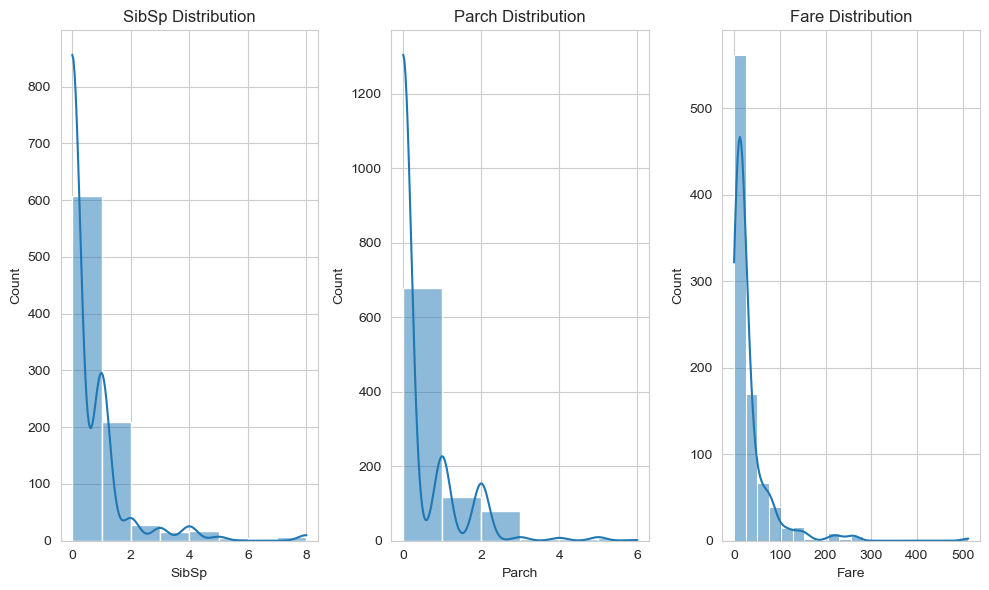

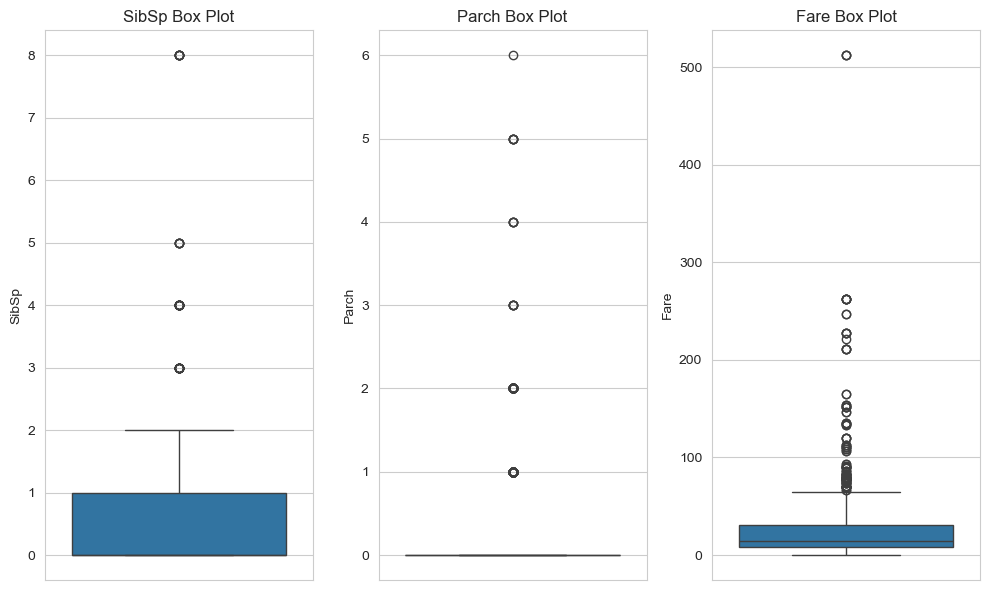

In [60]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot 1
sns.histplot(df['SibSp'], bins=8, kde=True)
plt.title('SibSp Distribution')

plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot 2
sns.histplot(df['Parch'], bins=6, kde=True)
plt.title('Parch Distribution')

plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot 3
sns.histplot(df['Fare'], bins=20, kde=True)
plt.title('Fare Distribution')

plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['SibSp'])
plt.title('SibSp Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Parch'])
plt.title('Parch Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Fare'])
plt.title('Fare Box Plot')

plt.tight_layout()
plt.show()




Most passengers paid low fares, as shown by the right-skewed fare distribution—only a few paid much more, likely due to higher travel classes.
The box plots for SibSp and Parch show that most people traveled alone or with few family members, with only a few bringing large families.
The fare box plot also highlights some outliers—passengers who paid much more than average.


In [56]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

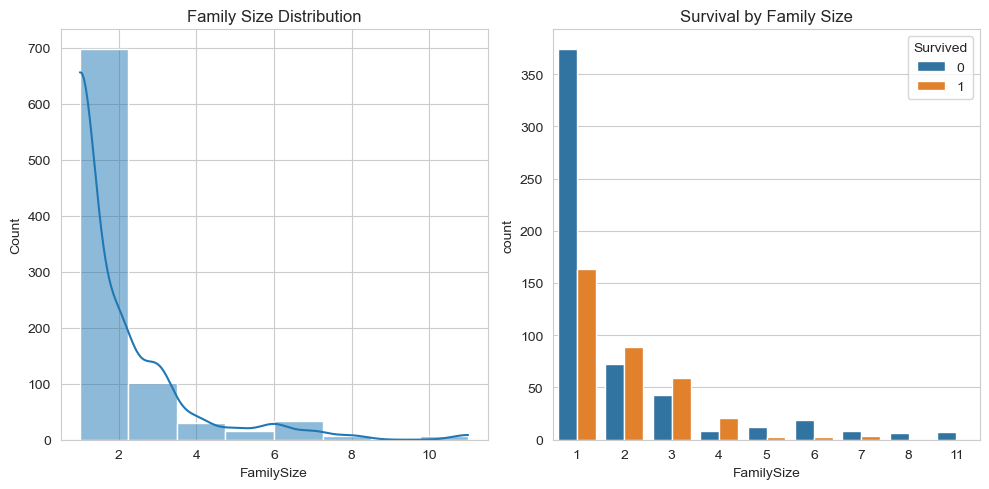

In [58]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['FamilySize'], bins=8, kde=True)
plt.title('Family Size Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')

plt.tight_layout()
plt.show()




Most people on board were traveling alone, which matches what we saw earlier with the family-related data.
What’s interesting is that those in small families—just 2 to 4 people—seemed to have a better chance of surviving. They likely had enough support to help each other, but not so many that it slowed them down during the chaos.


In [43]:
df['Age'] = df['Age'].fillna(df['Age'].median())
print(df['Age'].isnull().sum())


0


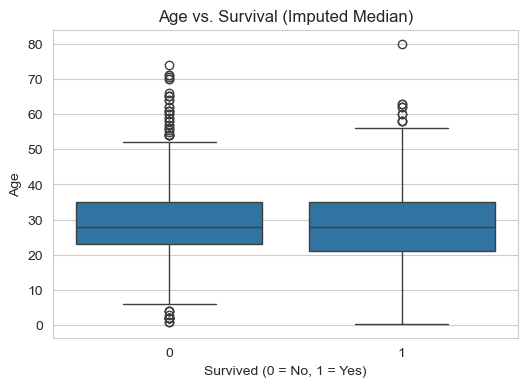

In [45]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age vs. Survival (Imputed Median)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

The box plot shows that the median age is about the same for both survivors and non-survivors, which suggests that age alone might not have been a major factor in survival. However, the age distribution for survivors leans slightly younger, while non-survivors have a longer tail, indicating more older passengers in that group.

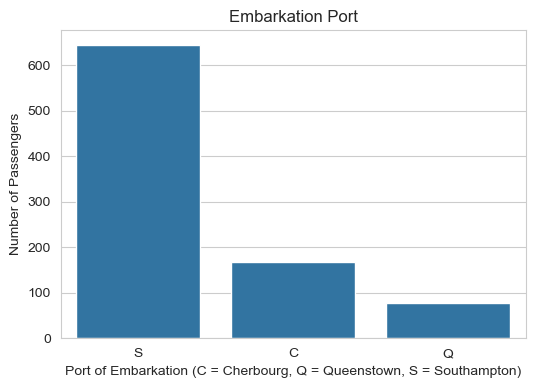

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Embarked')
plt.title('Embarkation Port')
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Number of Passengers')
plt.show()

The count plot shows most passengers got on at Southampton, with fewer from Cherbourg and Queenstown. This means Southampton was the main departure point for the Titanic.

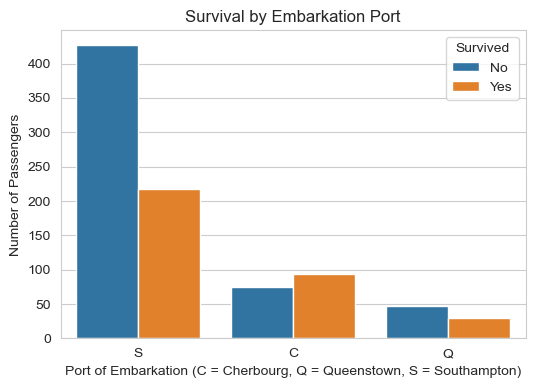

In [49]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival by Embarkation Port')
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


The stacked bar chart shows that passengers from Cherbourg had the highest survival rate, while those from Southampton had the lowest. This might be linked to other factors like travel class or wealth.

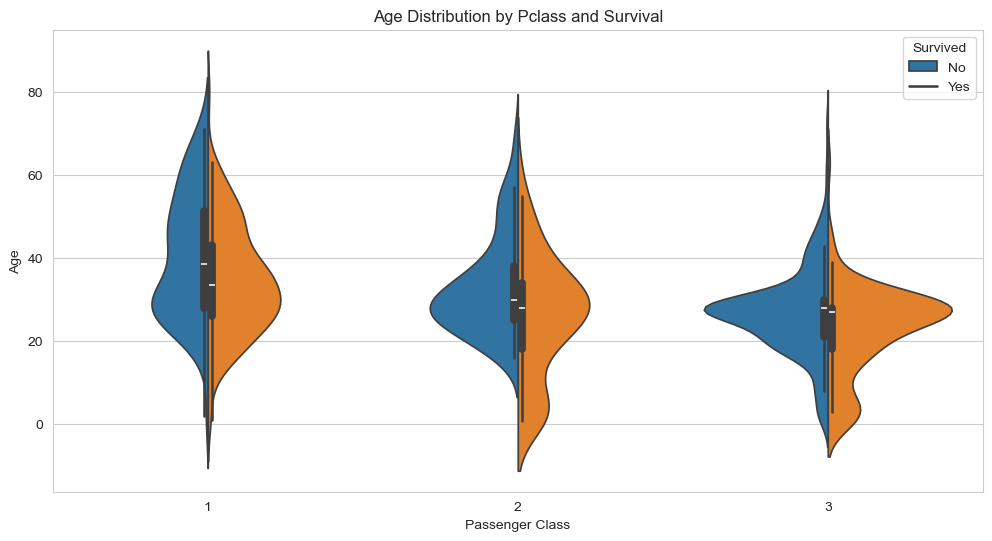

In [62]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True)
plt.title('Age Distribution by Pclass and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


The violin plots show that first-class passengers were generally older, and older ones had better survival chances—possibly due to better access to lifeboats. In second and third class, younger passengers were more likely to survive, maybe thanks to being more physically resilient.

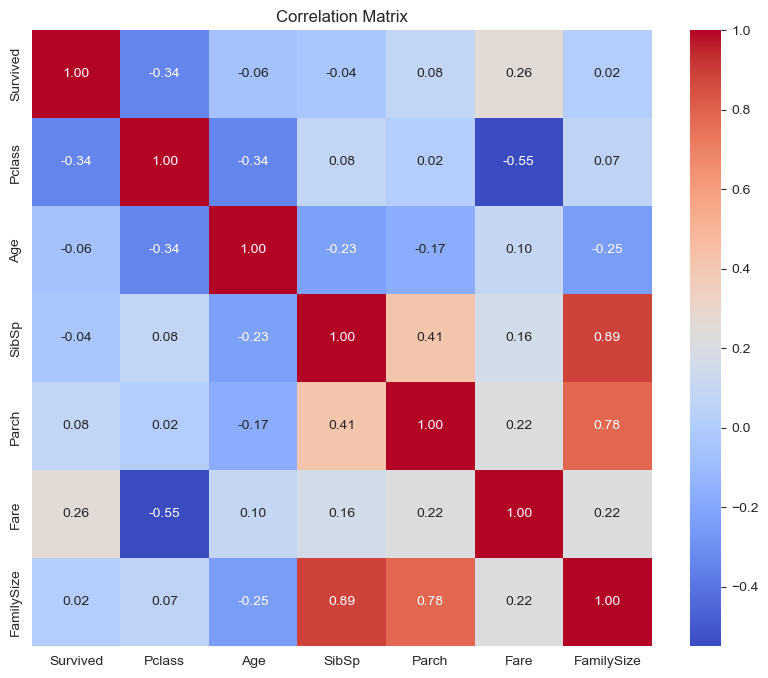

In [53]:
correlation_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The heatmap shows that passengers who paid higher fares were more likely to survive, and first-class passengers had better survival chances than those in lower classes.
Family size had almost no effect on survival. Not surprisingly, higher-class tickets cost more, as seen in the negative link between Pclass and Fare.
Younger passengers had a slightly better chance of surviving, but the connection is weak. Also, SibSp and Parch are linked since both relate to family size.

CONCLUSION:
Passenger class: First-class passengers had a much higher survival rate, showing that socioeconomic status played a big role.
Fare: Those who paid higher fares were more likely to survive, reinforcing the impact of socioeconomic factors.
Age: Younger passengers had a slightly higher survival rate.
Family Size: Passengers with small families (2-4 people) survived more often than those traveling alone or with large groups.
Port of Embarkation: Passengers from Cherbourg had a higher survival rate compared to those from Southampton or Queenstown.
In conclusion, socioeconomic status, age, family size, and embarkation port all played a significant role in survival during the Titanic disaster.
Thank you !